# atlases

In [1]:
# from importlib import reload
# import sys
# reload(sys.modules["util.atlas"])

import numpy as np
import matplotlib.pyplot as plt

from util import plot
from util.atlas import Atlas

%cd ..

/scratch/gpfs/zzada/fconv


In [10]:
# from nilearn.datasets import fetch_atlas_surf_destrieux
# bunch = fetch_atlas_surf_destrieux(data_dir='mats')
# idsL = bunch['map_left']
# idsR = bunch['map_right']
# labels = bunch['labels']
# # 10242, need to upsample
# len(idsL)

In [5]:
schaefer = Atlas.schaefer()
glasser = Atlas.glasser2016()
lana_atlas = Atlas.lana2022()
lang_atlas = Atlas.ev2010()

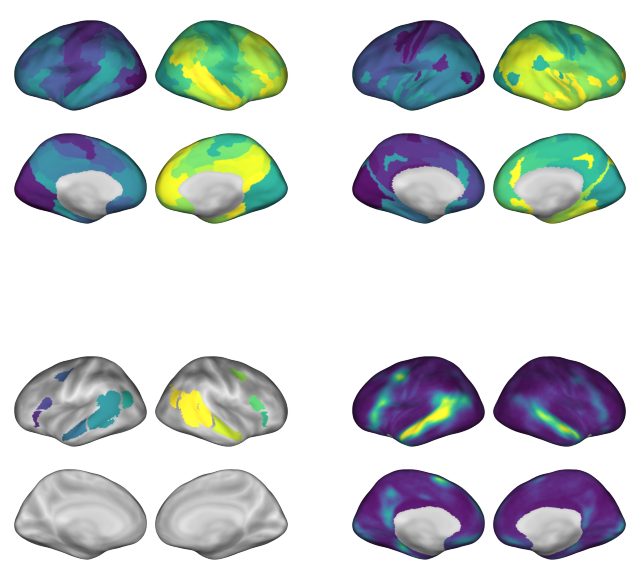

In [315]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

for ax, atlas in zip(axes.ravel(), (schaefer, glasser, lang_atlas, lana_atlas)):
    plot.surface_plot(atlas.label_img, cmap='viridis', fig=fig, ax=ax, cbar=False, vmin=0)
fig.show()

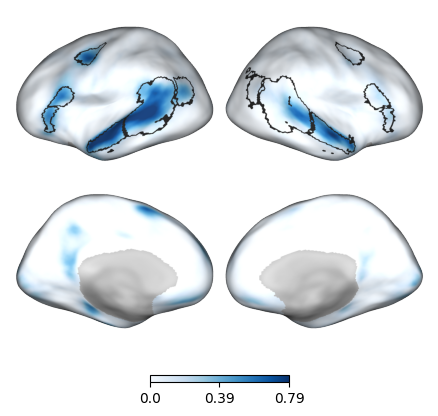

In [348]:
plot.surface_plot(lana_atlas.label_img, vmin=0, cmap='Blues', atlas=lang_atlas);

## custom glasser atlas

In [13]:
# from LanAtlas paper SI-1 fig
ev_glasser_rois = {
    'LangTemp_AntTemp': ['TA2', 'STSva', 'STSda', 'STGa', 'PI', 'A5'],
    'LangTemp_PostTemp': ['TPOJ1', 'TPOJ2', 'STV', 'STSvp', 'STSdp', 'PSL', 'PHT', 'PGi'],
    'LangTemp_AngG': ['TPOJ3', 'PGs'],
    'LangFrnt_MFG': ['FEF', '55b'],
    'LangFrnt_IFG': ['IFSp', 'IFJa', '44'],
    'LangFrnt_IFGorb': ['47l', '45'],
}

# from https://doi.org/10.1093%2Fons%2Fopy257
dmn_rois = {
    # DMN was split into three regions
    'DMN_LatPar': ['PFm', 'PGs', 'PGi'],
    # 'AntCing': ['a24', 'p24', 'd32', '9M', '10r', '10v'],
    # 'PostCing': ['31a', '31pv', '31pd', 'v23ab', 'd23ab', '23d', 'RSC', '7m', 'POS1', 'POS2'],

    # the posterior region was further split into dorsal and ventral regions
    'DMN_vPCC': ['31pv', '31pd', 'v23ab', 'RSC'], 
    # 'dPCC': ['31a', '23c', '23d', 'd23ab'],
}

custom_low = {
    # low-level areas
    'MOT_SM': ['3b', '3a', '4'],
    'AUD_EAC': ['A1', 'LBelt', 'PBelt', 'A4'],  # from narratives + A4 - RI
}

custom_high = {
    'DMN_pCun': ['7m', 'POS1', 'POS2'],

    # add angular gyrus tpoj to this area for now...
    'DMN_LatPar': ['PFm', 'PGs', 'PGi', 'TPOJ3'],

    # replace ev parcels to remove DMN parcels
    'LangTemp_PostTemp': ['TPOJ1', 'TPOJ2', 'STV', 'STSvp', 'STSdp', 'PSL', 'PHT',],
}

custom_atlas_rois = custom_low | ev_glasser_rois | dmn_rois | custom_high

del custom_atlas_rois['LangTemp_AngG']

# separate into hemispheres
rois = {}
for name, labels in custom_atlas_rois.items():
    rois[f'LH_{name}'] = [f'L_{label}' for label in labels]
for name, labels in custom_atlas_rois.items():
    rois[f'RH_{name}'] = [f'R_{label}' for label in labels]

len(rois)

20

In [22]:
atlas = glasser
label_img = np.zeros_like(atlas.label_img)
# label_img = lang_atlas.copy()
labels = {0: '???'}
for i, (k, v) in enumerate(rois.items(), 1):
    mask = atlas.roimask(v)
    count = mask.sum()
    label_img[mask] = i
    labels[i] = k
    print(i, k, count, v)
    assert count
    
custom_atlas = Atlas('langrois_glasser', label_img, labels)
custom_atlas.save()

1 LH_AntTemp 822 ['L_TA2', 'L_STSva', 'L_STSda', 'L_STGa', 'L_PI', 'L_A5']
2 LH_PostTemp 1905 ['L_TPOJ1', 'L_TPOJ2', 'L_STV', 'L_STSvp', 'L_STSdp', 'L_PSL', 'L_PHT', 'L_PGi']
3 LH_MFG 371 ['L_FEF', 'L_55b']
4 LH_IFG 442 ['L_IFSp', 'L_IFJa', 'L_44']
5 LH_IFGorb 399 ['L_47l', 'L_45']
6 LH_LatPar 1484 ['L_PFm', 'L_PGs', 'L_PGi', 'L_TPOJ3']
7 LH_vPCC 630 ['L_31pv', 'L_31pd', 'L_v23ab', 'L_RSC']
8 LH_SM 2166 ['L_3b', 'L_3a', 'L_4']
9 LH_EAC 902 ['L_A1', 'L_LBelt', 'L_PBelt', 'L_RI', 'L_A4']
10 LH_pCun 726 ['L_7m', 'L_POS1', 'L_POS2']
11 RH_AntTemp 953 ['R_TA2', 'R_STSva', 'R_STSda', 'R_STGa', 'R_PI', 'R_A5']
12 RH_PostTemp 2226 ['R_TPOJ1', 'R_TPOJ2', 'R_STV', 'R_STSvp', 'R_STSdp', 'R_PSL', 'R_PHT', 'R_PGi']
13 RH_MFG 318 ['R_FEF', 'R_55b']
14 RH_IFG 457 ['R_IFSp', 'R_IFJa', 'R_44']
15 RH_IFGorb 285 ['R_47l', 'R_45']
16 RH_LatPar 1534 ['R_PFm', 'R_PGs', 'R_PGi', 'R_TPOJ3']
17 RH_vPCC 633 ['R_31pv', 'R_31pd', 'R_v23ab', 'R_RSC']
18 RH_SM 2050 ['R_3b', 'R_3a', 'R_4']
19 RH_EAC 741 ['R_A1', 'R_

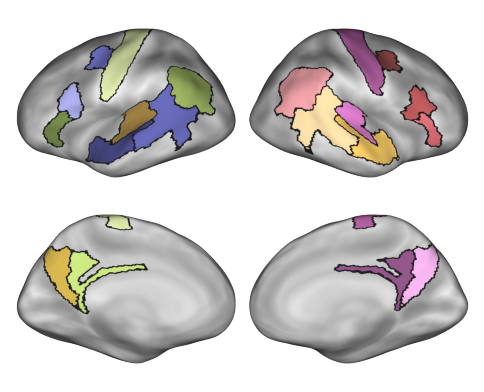

In [23]:
fig = plot.surface_plot(custom_atlas.label_img, vmin=1, cmap='tab20b', cbar=False, atlas=custom_atlas)

In [15]:
atlas = glasser
label_img = np.zeros_like(atlas.label_img)
labels = {0: '???'}
i = 1
for k, v in rois.items():
    for p in v:
        mask = atlas.roimask([p])
        count = mask.sum()
        label_img[mask] = i
        labels[i] = k + '_' + p[2:]
        print(i, labels[i], count)
        i += 1
        assert count
    
custom_atlas = Atlas('langrois_glasser_parc', label_img, labels)
custom_atlas.save()
len(custom_atlas)

1 LH_MOT_SM_3b 711
2 LH_MOT_SM_3a 454
3 LH_MOT_SM_4 1001
4 LH_AUD_EAC_A1 101
5 LH_AUD_EAC_LBelt 145
6 LH_AUD_EAC_PBelt 186
7 LH_AUD_EAC_A4 240
8 LH_LangTemp_AntTemp_TA2 90
9 LH_LangTemp_AntTemp_STSva 171
10 LH_LangTemp_AntTemp_STSda 159
11 LH_LangTemp_AntTemp_STGa 76
12 LH_LangTemp_AntTemp_PI 141
13 LH_LangTemp_AntTemp_A5 185
14 LH_LangTemp_PostTemp_TPOJ1 212
15 LH_LangTemp_PostTemp_TPOJ2 149
16 LH_LangTemp_PostTemp_STV 169
17 LH_LangTemp_PostTemp_STSvp 258
18 LH_LangTemp_PostTemp_STSdp 241
19 LH_LangTemp_PostTemp_PSL 218
20 LH_LangTemp_PostTemp_PHT 218
21 LH_LangFrnt_MFG_FEF 210
22 LH_LangFrnt_MFG_55b 161
23 LH_LangFrnt_IFG_IFSp 130
24 LH_LangFrnt_IFG_IFJa 140
25 LH_LangFrnt_IFG_44 172
26 LH_LangFrnt_IFGorb_47l 162
27 LH_LangFrnt_IFGorb_45 237
28 LH_DMN_LatPar_PFm 614
29 LH_DMN_LatPar_PGs 331
30 LH_DMN_LatPar_PGi 440
31 LH_DMN_LatPar_TPOJ3 99
32 LH_DMN_vPCC_31pv 126
33 LH_DMN_vPCC_31pd 135
34 LH_DMN_vPCC_v23ab 95
35 LH_DMN_vPCC_RSC 274
36 LH_DMN_pCun_7m 161
37 LH_DMN_pCun_POS1 263
38 

76

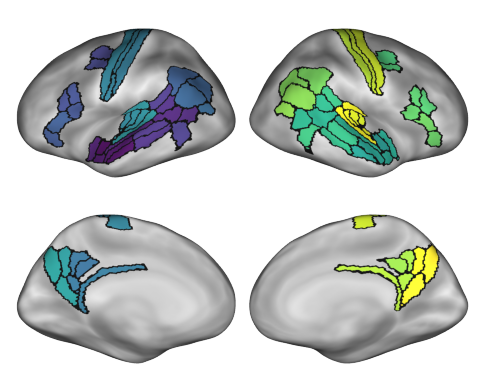

In [29]:
fig = plot.surface_plot(custom_atlas.label_img, vmin=0, cmap='viridis', cbar=False, atlas=custom_atlas)

## custom schaefer atlas

In [366]:
atlas = schaefer
lang_labels = lang_atlas.labels

In [483]:
# Pick parcels that overlap with lang atlas
threshold = 0.25

rois = {}
for i, lang_label in enumerate(lang_labels, 1):
    ids, counts = np.unique(atlas.label_img[lang_atlas.label_img == i], return_counts=True)

    new_labels = []
    for parc_id, parc_count in zip(ids, counts):
        parc_label = atlas.label(parc_id)
        portion = parc_count / atlas.num_voxels(parc_id)
        if portion > threshold:
            new_labels.append(parc_label)
    #     print(lang_label, parc_label, parc_id, portion)
    # print()
    rois[lang_label] = new_labels

    # doing this to keep all LH together
    if i == 6:
        rois['LH_SM'] = [lb for lb in atlas.labels if lb.startswith('17Networks_LH_SomMotB_Cent')]
        rois['LH_EAC'] = [lb for lb in atlas.labels if lb.startswith('17Networks_LH_SomMotB_Aud')]
        rois['LH_pCun'] = [lb for lb in atlas.labels if lb.startswith('17Networks_LH_DefaultA_pCunPCC')]

rois['RH_EAC'] = [lb for lb in atlas.labels if lb.startswith('17Networks_RH_SomMotB_Aud')]
rois['RH_SM'] = [lb for lb in atlas.labels if lb.startswith('17Networks_RH_SomMotB_Cent')]
rois['RH_pCun'] = [lb for lb in atlas.labels if lb.startswith('17Networks_RH_DefaultA_pCunPCC')]

# extend angular gyrus to include more DMN and less postTemp
rois['LH_AngG'].extend([lb for lb in atlas.labels if lb.startswith('17Networks_LH_DefaultA_IPL')])
rois['RH_AngG'].extend([lb for lb in atlas.labels if lb.startswith('17Networks_RH_DefaultA_IPL')])
rois['LH_AngG'].extend([lb for lb in atlas.labels if lb.startswith('17Networks_LH_DefaultB_IPL')])  # NOTE maybe not all...
rois['RH_AngG'].extend([lb for lb in atlas.labels if lb.startswith('17Networks_RH_DefaultB_IPL')])
rois['LH_AngG'].extend([lb for lb in atlas.labels if lb.startswith('17Networks_LH_DefaultC_IPL')])
rois['RH_AngG'].extend([lb for lb in atlas.labels if lb.startswith('17Networks_RH_DefaultC_IPL')])

len(rois)

18

In [481]:
# # for testing
# # [lb for lb in atlas.labels if lb.startswith('17Networks_LH_TempPar')]
# rois = {'test': [lb for lb in atlas.labels if lb.startswith('17Networks_RH_TempPar')]}
# rois = {'test': [lb for lb in atlas.labels if lb.startswith('17Networks_LH_DefaultB_IPL')]}

In [486]:
label_img = np.zeros_like(atlas.label_img)
labels = {0: '???'}
for i, (k, v) in enumerate(rois.items(), 1):
    mask = atlas.roimask(v)
    count = mask.sum()
    label_img[mask] = i
    labels[i] = k
    print(i, k, count, v)
    assert count
    
custom_atlas = Atlas('langrois_schaefer', label_img, labels)
custom_atlas.save()

1 LH_IFGorb 279 ['17Networks_LH_DefaultB_PFCv_4', '17Networks_LH_DefaultB_PFCv_6', '17Networks_LH_DefaultB_PFCv_7']
2 LH_IFG 392 ['17Networks_LH_SalVentAttnB_Ins_8', '17Networks_LH_ContA_PFCl_1', '17Networks_LH_ContA_PFCl_2', '17Networks_LH_ContA_PFClv_2', '17Networks_LH_DefaultB_PFCv_9']
3 LH_MFG 354 ['17Networks_LH_SomMotB_Cent_10', '17Networks_LH_DorsAttnB_FEF_1', '17Networks_LH_DorsAttnB_FEF_3', '17Networks_LH_DefaultB_PFCl_1']
4 LH_AntTemp 628 ['17Networks_LH_DefaultB_Temp_4', '17Networks_LH_DefaultB_Temp_5', '17Networks_LH_DefaultB_Temp_7', '17Networks_LH_TempPar_1', '17Networks_LH_TempPar_2', '17Networks_LH_TempPar_3']
5 LH_PostTemp 2212 ['17Networks_LH_SomMotB_Aud_14', '17Networks_LH_DorsAttnA_TempOcc_10', '17Networks_LH_DorsAttnB_TempOcc_2', '17Networks_LH_ContA_Temp_3', '17Networks_LH_ContB_Temp_3', '17Networks_LH_ContB_Temp_4', '17Networks_LH_DefaultB_Temp_8', '17Networks_LH_DefaultB_Temp_9', '17Networks_LH_DefaultB_Temp_10', '17Networks_LH_DefaultB_Temp_11', '17Networks_LH_

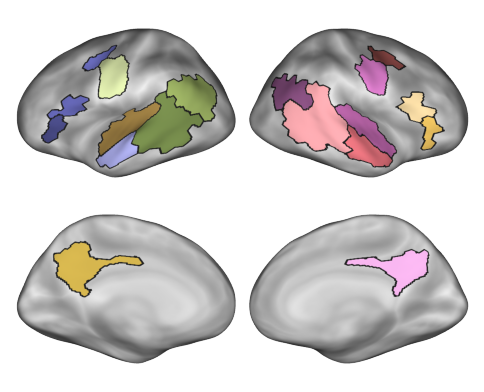

In [487]:
fig = plot.surface_plot(custom_atlas.label_img, vmin=1, cmap='tab20b', cbar=False, atlas=custom_atlas)

In [ ]:
# for label, i in label2id.items():
#     regions = parc_mask == i
#     p = plot.get_surfplot(size=(800, 200), zoom=1.2, layout="row")
#     p.add_layer(regions, cmap="tab10", cbar=False)
#     p.add_layer(regions, cmap="gray", as_outline=True, cbar=False)
#     fig = p.build()
#     fig.supylabel(f"{i}:{label}", rotation=0)
#     fig.savefig(f"figures/glasser-rois/{label}-{i:03d}.png")
#     plt.close()
# plt.close()